In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras import backend as K

cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

In [3]:
from keras.layers import Activation ,Conv2D ,BatchNormalization , Dense ,Dropout ,Flatten ,MaxPool2D ,GlobalMaxPool2D ,GlobalAveragePooling2D
from keras.models import Sequential

In [4]:
model = Sequential([
            BatchNormalization(axis=1, input_shape=(160,320,1)),
            Conv2D(32,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(32,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(64,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(64,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
            MaxPool2D((2,2)),
            BatchNormalization(axis=1),
            Conv2D(128,(3,3), activation='relu'),
           
            BatchNormalization(axis=1),
        Conv2D(128 ,(3,3), activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        Conv2D(128 ,(3,3), activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        
        Conv2D(2 ,(3,3), border_mode='same'),
        GlobalAveragePooling2D(),
        Activation('softmax')
           
        ])

/home/aviw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/home/aviw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
/home/aviw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(2, (3, 3), padding="same")`


In [5]:
from keras.optimizers import Adam
model.compile(Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.load_weights ('fcnn16.h5')

In [10]:
model.pop()

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 160, 320, 1)       640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 158, 318, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 158, 318, 32)      632       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 316, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 158, 32)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 78, 158, 32)       312       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 156, 64)       18496     
__________

In [71]:
import numpy as np
import random


def white (img):
    
    x= ((np.average(img))/100)
    return (img**x)
    

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 160, 320, 1)       640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 158, 318, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 158, 318, 32)      632       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 316, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 158, 32)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 78, 158, 32)       312       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 156, 64)       18496     
__________

In [73]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
gen=image.ImageDataGenerator( rescale=1./255, rotation_range=15,shear_range=0.1 ,channel_shift_range=0.2, preprocessing_function=white 
    , width_shift_range=0.4 , height_shift_range=0.25)
gen1=image.ImageDataGenerator( rescale=1./255)
gen2=image.ImageDataGenerator( rescale=1./255,preprocessing_function=white )

In [45]:
batch_size=30

train= gen.flow_from_directory('train', target_size=(160,320),
                class_mode='categorical', shuffle=True, batch_size=batch_size, color_mode='grayscale')

Found 2387 images belonging to 2 classes.


In [46]:
val= gen1.flow_from_directory('val', target_size=(160,320),
                class_mode='categorical', shuffle=False, batch_size=batch_size, color_mode='grayscale')

Found 594 images belonging to 2 classes.


In [24]:
from keras.optimizers import Adam
model.compile(Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
batch_size=30
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=3, 
                            validation_data=val, validation_steps=594/batch_size)

Epoch 1/3


/home/aviw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  


KeyboardInterrupt: 

In [ ]:
model.optimizer.lr=0.1
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.save_weights ('fcnn1.h5')

In [ ]:
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.optimizer.lr=0.01
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
model.save_weights ('fcnn3.h5')

In [ ]:
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
model.save_weights ('fcnn4.h5')

In [ ]:
model.optimizer.lr=0.001
model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
model.save_weights ('fcnn5.h5')

In [ ]:

model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=5, 
                            validation_data=val, validation_steps=594/batch_size)
model.save_weights ('fcnn6.h5')

In [ ]:
model.optimizer.lr=0.0001
for i in range (7,17):
    model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=1, 
                            validation_data=val, validation_steps=594/batch_size)
    model.save_weights ('fcnn{x}.h5'.format(x=i))

In [ ]:

model.fit_generator(train, steps_per_epoch=2387/batch_size, epochs=1, 
                            validation_data=val, validation_steps=594/batch_size)

In [ ]:
model.load_weights ('fcnn16.h5')

In [ ]:
test = gen.flow_from_directory('newtest', target_size=(160,320),
                class_mode='binary', shuffle=False, batch_size=1 ,color_mode='grayscale')

In [ ]:
pre=model.predict_generator(test,115)

In [ ]:
files = test.filenames

In [46]:
mistake=0
doubt=0
file=[]
file1=[]
correct=0
num=0
for x in pre :
    
    if x[0]<0.8 and x[0]>0.2: 
        doubt+=1
        print (x , "doubt")
        file1.append (files[num])
    else:
        if num<0:
            if x[0]<0.8: 
                mistake+=1
                print (x,num)
                file.append (files[num])
            else : correct+=1
        else:
            if x[1]<0.8: 
                mistake+=1
                print (x,num) 
                file.append (files[num])
            else : correct+=1
    num+=1
    
all=correct+mistake

NameError: name 'pre' is not defined

In [ ]:
correct/all

In [ ]:
doubt/(all+doubt)

In [ ]:
mistake

In [ ]:
mistake/all

In [ ]:
image.load_img ('test/'+files[2])

In [11]:
test = gen.flow_from_directory('newtest', target_size=(160,320),
                class_mode=None, shuffle=False, batch_size=1 , color_mode='grayscale')

Found 115 images belonging to 2 classes.


In [71]:
train= gen.flow_from_directory('train', target_size=(160,320),
                class_mode=None, shuffle=False, batch_size=1, color_mode='grayscale')

Found 2387 images belonging to 2 classes.


In [27]:
import numpy as np
train1=np.concatenate([train.next() for i in range(train.samples)])

In [12]:
import numpy as np
test1=np.concatenate([test.next() for i in range(test.samples)])

In [ ]:
from matplotlib import pyplot as plt

def plot(img):
    plt.imshow(to_plot(img))


def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')
def to_plot(img):
    if K.image_dim_ordering() == 'tf':
        return np.rollaxis(img, 0, 1).astype(np.uint8)
    else:
        return np.rollaxis(img, 0, 3).astype(np.uint8)

In [ ]:
%matplotlib inline

In [ ]:
from keras import backend as K
l =model.layers
conv_fn = K.function([model.layers[0].input, K.learning_phase()],
                                  [model.layers[-3].output])

In [ ]:
train1.shape

In [ ]:
[x,0]

In [ ]:

conv = conv_fn([train1,0])

In [ ]:
y= test1[56]

In [ ]:
y[15]

In [ ]:
image.array_to_img (y)

In [ ]:
pre [pic]

In [ ]:

inp = np.expand_dims(test1[pic], 0)
conv = conv_fn([inp,0])
conv=conv[0]
print (conv.shape)
show=np.swapaxes(conv,2,3)
show=np.swapaxes(show,1,2)
show=show[0]
print (show.shape)

In [ ]:
show[1].shape

In [ ]:
import scipy
show=scipy.misc.imresize (show[1],size=(160,320))
print (show.shape)

In [ ]:
x=np.reshape (test1[pic] , (160,320))


In [ ]:
image.array_to_img (x)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow (x ,cmap="gray")

In [ ]:
x=np.reshape (test1[pic] , (160,320))

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1, 2, 1)
plt.imshow (x ,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow (show , cmap="cool") 

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(x ,cmap="gray", alpha=1)
plt.imshow(show, cmap="cool", alpha=0.5)

In [99]:
labels=train.classes

In [100]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [18]:
import sklearn

In [20]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [119]:
neigh = knn (n_neighbors=5)

In [38]:
160*320

51200

train1=np.array (train1)

In [97]:
train1= np.reshape (train1,(2387,60928))

In [98]:
train1[0]

array([-0.59433913, -0.59433913, -0.59433913, ..., -0.58523554,
       -0.11305478, -0.58523554], dtype=float32)

In [120]:
neigh.fit (train1,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [112]:
test1=np.reshape (test1, (238,60928))

In [138]:
neigh.predict_proba(test1[6])

/home/aviw/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.4,  0.6]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [127]:
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [125]:
num=0
for i in range (238):
    if pre[i]== x[i]: num+=1

In [126]:
num/238

0.15126050420168066

In [91]:
train1=model.predict_generator (train,2387)

In [111]:
test1=model.predict_generator (test,238)

In [96]:
14*34*128

60928

In [80]:
model.output_shape

(None, 14, 34, 128)

In [81]:
test1.shape

(115, 2)

In [89]:
from keras.models import Model
model = Model (model.input, model.output)

In [90]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1_input  (None, 160, 320, 1)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 160, 320, 1)       640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 158, 318, 32)      320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 158, 318, 32)      632       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 316, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 78, 158, 32)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 78, 158, 32)       312       
__________

In [76]:
test = gen.flow_from_directory('newtest', target_size=(160,320),
                class_mode=None, shuffle=False, batch_size=1 , color_mode='grayscale')

import numpy as np
test1=np.concatenate([test.next() for i in range(test.samples)])

Found 115 images belonging to 2 classes.


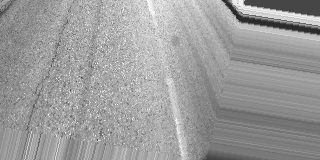

In [77]:
image.array_to_img (test1[1])

In [70]:
test1[0]

array([[[ inf],
        [ inf],
        [ inf],
        ..., 
        [ inf],
        [ inf],
        [ inf]],

       [[ inf],
        [ inf],
        [ inf],
        ..., 
        [ inf],
        [ inf],
        [ inf]],

       [[ inf],
        [ inf],
        [ inf],
        ..., 
        [ inf],
        [ inf],
        [ inf]],

       ..., 
       [[ inf],
        [ inf],
        [ inf],
        ..., 
        [ inf],
        [ inf],
        [ inf]],

       [[ inf],
        [ inf],
        [ inf],
        ..., 
        [ inf],
        [ inf],
        [ inf]],

       [[ inf],
        [ inf],
        [ inf],
        ..., 
        [ inf],
        [ inf],
        [ inf]]], dtype=float32)

In [189]:
for i in range (115):
   test1[i] = test1[i]** ((np.average(test1[i])/100))

In [53]:
(np.average(test1[1]))

inf

In [38]:
test1[2]**1.4

array([[[ 0.32000268],
        [ 0.26967695],
        [ 0.26215631],
        ..., 
        [ 0.13809952],
        [ 0.14437625],
        [ 0.14122792]],

       [[ 0.28874126],
        [ 0.35216266],
        [ 0.30425721],
        ..., 
        [ 0.13190326],
        [ 0.14437625],
        [ 0.14754432]],

       [[ 0.33195943],
        [ 0.39357147],
        [ 0.33597273],
        ..., 
        [ 0.14122792],
        [ 0.16695732],
        [ 0.18027252]],

       ..., 
       [[ 0.12883581],
        [ 0.14122792],
        [ 0.15716515],
        ..., 
        [ 0.17025869],
        [ 0.12883581],
        [ 0.12883581]],

       [[ 0.11677546],
        [ 0.11381384],
        [ 0.15393895],
        ..., 
        [ 0.15073195],
        [ 0.12578909],
        [ 0.12276331]],

       [[ 0.09933867],
        [ 0.11087408],
        [ 0.13499123],
        ..., 
        [ 0.12276331],
        [ 0.11677546],
        [ 0.10506113]]], dtype=float32)

In [66]:
 x= ((np.average(test1[2]))/0.39)

In [67]:
x

inf

In [56]:
(np.average(test1[1]))

0.46440303